# Import

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from fitter import Fitter, get_common_distributions
import seaborn as sns
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from scipy import sparse

# Load and Inspect data

In [2]:
# Load your dataset
data = pd.read_csv('/Users/faridabey/Downloads/TMDB_movie_dataset_v11.csv')

# Inspect the data
print(data.head())
print(data.info())

       id            title  vote_average  vote_count    status release_date  \
0   27205        Inception         8.364       34495  Released   2010-07-15   
1  157336     Interstellar         8.417       32571  Released   2014-11-05   
2     155  The Dark Knight         8.512       30619  Released   2008-07-16   
3   19995           Avatar         7.573       29815  Released   2009-12-15   
4   24428     The Avengers         7.710       29166  Released   2012-04-25   

      revenue  runtime  adult                     backdrop_path  ...  \
0   825532764      148  False  /8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg  ...   
1   701729206      169  False  /pbrkL804c8yAv3zBZR4QPEafpAR.jpg  ...   
2  1004558444      152  False  /nMKdUUepR0i5zn0y1T4CsSB5chy.jpg  ...   
3  2923706026      162  False  /vL5LR6WdxWPjLPFRLe133jXWsh5.jpg  ...   
4  1518815515      143  False  /9BBTo63ANSmhC4e6r62OJFuK2GL.jpg  ...   

    original_title                                           overview  \
0        Inception 

# Cleaning Data

# Dropping unnecessary columns

In [3]:
data.drop(columns=['backdrop_path', 'homepage', 'poster_path', 'original_title', 'id', 'imdb_id'], inplace=True)
print(data.head())
print(data.info())

             title  vote_average  vote_count    status release_date  \
0        Inception         8.364       34495  Released   2010-07-15   
1     Interstellar         8.417       32571  Released   2014-11-05   
2  The Dark Knight         8.512       30619  Released   2008-07-16   
3           Avatar         7.573       29815  Released   2009-12-15   
4     The Avengers         7.710       29166  Released   2012-04-25   

      revenue  runtime  adult     budget original_language  \
0   825532764      148  False  160000000                en   
1   701729206      169  False  165000000                en   
2  1004558444      152  False  185000000                en   
3  2923706026      162  False  237000000                en   
4  1518815515      143  False  220000000                en   

                                            overview  popularity  \
0  Cobb, a skilled thief who commits corporate es...      83.952   
1  The adventures of a group of explorers who mak...     140.241

# Numric featuers range

In [126]:
for col in data.select_dtypes(include=[np.float64, np.int64]).columns:
    print(f"Range of values for column '{col}': {data[col].min()} to {data[col].max()}")

Range of values for column 'vote_average': 0.0 to 10.0
Range of values for column 'vote_count': 0 to 34495
Range of values for column 'revenue': -12 to 3000000000
Range of values for column 'runtime': -28 to 14400
Range of values for column 'budget': 0 to 900000000
Range of values for column 'popularity': 0.0 to 2994.357


# Missing Values

In [127]:
missing_values = data.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0]

if not columns_with_missing_values.empty:
    print("Features with missing data:")
    print(columns_with_missing_values)
else:
    print("There are no features with missing data.")

Features with missing data:
title                       13
release_date            176672
overview                223116
tagline                 957060
genres                  442380
production_companies    608193
production_countries    488752
spoken_languages        470629
keywords                808918
dtype: int64


# Percentage Nulls

In [128]:
# Select non-numerical columns
non_numerical_features = data.select_dtypes(exclude=[np.number])

# Select numerical columns
numerical_features = data.select_dtypes(include=[np.number])

# Calculate percentage of null values in non-numerical features
null_percentages = non_numerical_features.isnull().mean() * 100

# Print the percentage of null values for each non-numerical feature
print("Percentage of null values in non-numerical features before cleaning GENRES:")
for feature, percentage in null_percentages.items():
    print(f"{feature}: {percentage:.2f}%")

# Calculate percentage of zeros in numerical features
zero_percentages = (numerical_features == 0).mean() * 100

# Print the percentage of zeros for each numerical feature
print("\nPercentage of zeros in numerical features before cleaning GENRES:")
for feature, percentage in zero_percentages.items():
    print(f"{feature}: {percentage:.2f}%")


Percentage of null values in non-numerical features before cleaning GENRES:
title: 0.00%
status: 0.00%
release_date: 15.87%
adult: 0.00%
original_language: 0.00%
overview: 20.04%
tagline: 85.94%
genres: 39.73%
production_companies: 54.62%
production_countries: 43.89%
spoken_languages: 42.26%
keywords: 72.64%

Percentage of zeros in numerical features before cleaning GENRES:
vote_average: 68.61%
vote_count: 68.59%
revenue: 98.15%
runtime: 27.22%
budget: 94.90%
popularity: 10.92%


In [129]:
# Drop rows where 'genre' feature is null
data = data.dropna(subset=['genres'])

missing_genre_count = data['genres'].isnull().sum()

# Print the number of missing cells in the 'genre' column
print(f"Number of missing cells in 'genre': {missing_genre_count}")
if data['genres'].isnull().any():
    print("Genres NOT cleaned")
else:
    print("Genres is cleaned")
# Print the percentage of null values for each non-numerical feature
print("Percentage of null values in non-numerical features after cleaning GENRES:")
for feature, percentage in null_percentages.items():
    print(f"{feature}: {percentage:.2f}%")

# Calculate percentage of zeros in numerical features
zero_percentages = (numerical_features == 0).mean() * 100

# Print the percentage of zeros for each numerical feature
print("\nPercentage of zeros in numerical features after cleaning GENRES:")
for feature, percentage in zero_percentages.items():
    print(f"{feature}: {percentage:.2f}%")


Number of missing cells in 'genre': 0
Genres is cleaned
Percentage of null values in non-numerical features after cleaning GENRES:
title: 0.00%
status: 0.00%
release_date: 15.87%
adult: 0.00%
original_language: 0.00%
overview: 20.04%
tagline: 85.94%
genres: 39.73%
production_companies: 54.62%
production_countries: 43.89%
spoken_languages: 42.26%
keywords: 72.64%

Percentage of zeros in numerical features after cleaning GENRES:
vote_average: 68.61%
vote_count: 68.59%
revenue: 98.15%
runtime: 27.22%
budget: 94.90%
popularity: 10.92%


In [130]:
# dropping features with >= 65% nulls after cleaning genres
data.drop(columns=['revenue', 'budget', 'tagline'], inplace=True)

# reinitialize numerical columns
numerical_features = data.select_dtypes(include=[np.number])
# reinitialize non-numerical columns
non_numerical_features = data.select_dtypes(exclude=[np.number])

print(data.head())
print(data.info())

             title  vote_average  vote_count    status release_date  runtime  \
0        Inception         8.364       34495  Released   2010-07-15      148   
1     Interstellar         8.417       32571  Released   2014-11-05      169   
2  The Dark Knight         8.512       30619  Released   2008-07-16      152   
3           Avatar         7.573       29815  Released   2009-12-15      162   
4     The Avengers         7.710       29166  Released   2012-04-25      143   

   adult original_language                                           overview  \
0  False                en  Cobb, a skilled thief who commits corporate es...   
1  False                en  The adventures of a group of explorers who mak...   
2  False                en  Batman raises the stakes in his war on crime. ...   
3  False                en  In the 22nd century, a paraplegic Marine is di...   
4  False                en  When an unexpected enemy emerges and threatens...   

   popularity                   

# Features unique values

In [131]:
# Function to count unique values considering comma-separated values
def count_unique_values(series):
    # Split the comma-separated values and strip whitespace
    return series.astype(str).str.split(',').apply(lambda x: [value.strip() for value in x]).explode().nunique()

# Count unique values for all non-numerical features
unique_counts = non_numerical_features.apply(count_unique_values)

# Print the results
print("Number of unique values for each non-numerical feature:")
for feature, count in unique_counts.items():
    print(f"{feature}: {count} unique values")

Number of unique values for each non-numerical feature:
title: 591246 unique values
status: 6 unique values
release_date: 41273 unique values
adult: 2 unique values
original_language: 169 unique values
overview: 1837861 unique values
genres: 19 unique values
production_companies: 150453 unique values
production_countries: 249 unique values
spoken_languages: 185 unique values
keywords: 52806 unique values


# Duplicates

In [132]:
num_duplicates_before = data.duplicated().sum()
data.drop_duplicates(inplace=True)
num_duplicates_after = data.duplicated().sum()
print("Number of duplicate rows before removal:", num_duplicates_before)
print("Number of duplicate rows after removal:", num_duplicates_after)

Number of duplicate rows before removal: 121
Number of duplicate rows after removal: 0


#  Frequency count for production companies

In [133]:
# Function to count frequencies of unique values in a comma-separated feature, ignoring NaN
def count_frequencies(series):
    # Drop NaN values, split the comma-separated values and strip whitespace
    return (series.dropna()
            .astype(str)
            .str.split(',')
            .apply(lambda x: [value.strip() for value in x])
            .explode()
            .value_counts())

# Specify the feature you want to analyze
feature_name = 'production_companies'  # Change to your specific feature name

# Count frequencies
frequency_counts = count_frequencies(data[feature_name])

# Filter out frequencies less than 1000
frequency_counts_filtered = frequency_counts[frequency_counts >= 100]

# Count unique values after filtering
unique_count_after_filtering = frequency_counts_filtered.count()

# Print the results
print(f"Total unique values in '{feature_name}' before filtering: {frequency_counts.count()}")
print(f"Total unique values in '{feature_name}' after filtering (frequency >= 100): {unique_count_after_filtering}")

Total unique values in 'production_companies' before filtering: 150452
Total unique values in 'production_companies' after filtering (frequency >= 100): 507


Frequency counts for 'production_companies':
production_companies
Warner Bros. Pictures              3157
BBC                                2902
Metro-Goldwyn-Mayer                2829
Columbia Pictures                  2784
Paramount                          2604
                                   ... 
Lithuanian Film Studio              101
Red Bull Media House                101
Regione Lazio                       100
Turner Classic Movies               100
Toronto Metropolitan University     100
Name: count, Length: 507, dtype: int64


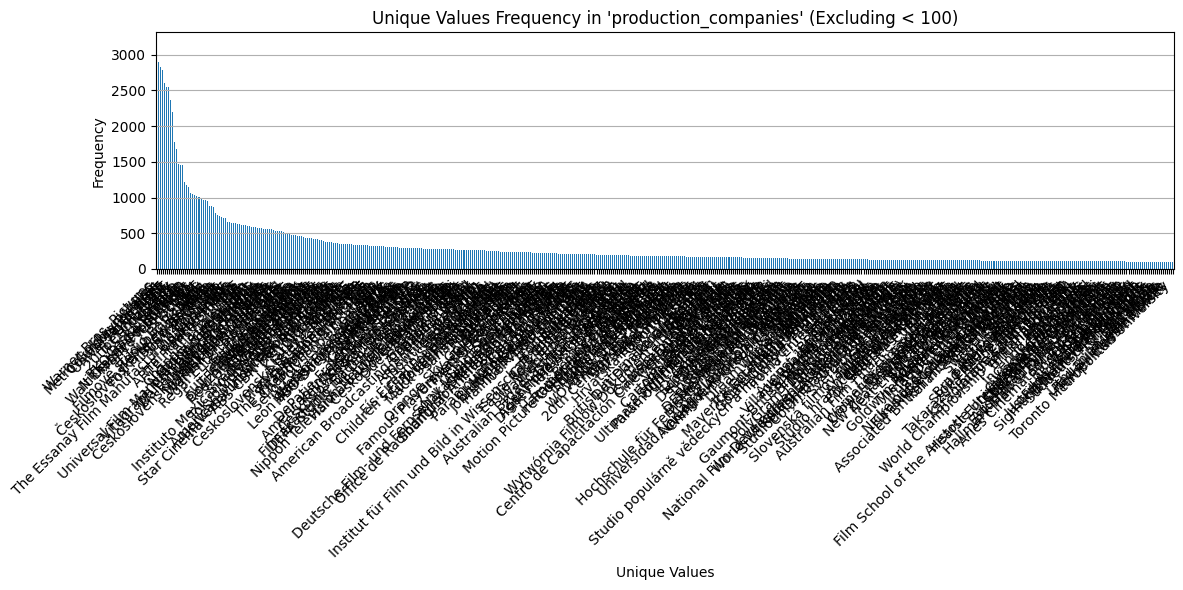

In [134]:
# Print frequency counts
print(f"Frequency counts for '{feature_name}':")
print(frequency_counts_filtered)

# Plotting
plt.figure(figsize=(12, 6))
frequency_counts_filtered.plot(kind='bar')  # Plot only the filtered values
plt.title(f"Unique Values Frequency in '{feature_name}' (Excluding < 100)")
plt.xlabel('Unique Values')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

In [135]:
# Remove low-frequency production companies from the column
data['production_companies'] = data['production_companies'].astype(str).apply(
    lambda x: ', '.join([value.strip() for value in x.split(',') if value.strip() in frequency_counts_filtered])
)

In [136]:
print(data.head())
print(data.info())

             title  vote_average  vote_count    status release_date  runtime  \
0        Inception         8.364       34495  Released   2010-07-15      148   
1     Interstellar         8.417       32571  Released   2014-11-05      169   
2  The Dark Knight         8.512       30619  Released   2008-07-16      152   
3           Avatar         7.573       29815  Released   2009-12-15      162   
4     The Avengers         7.710       29166  Released   2012-04-25      143   

   adult original_language                                           overview  \
0  False                en  Cobb, a skilled thief who commits corporate es...   
1  False                en  The adventures of a group of explorers who mak...   
2  False                en  Batman raises the stakes in his war on crime. ...   
3  False                en  In the 22nd century, a paraplegic Marine is di...   
4  False                en  When an unexpected enemy emerges and threatens...   

   popularity                   

In [137]:

# Specify the feature you want to analyze
feature_name = 'production_companies'  # Change this to the desired feature
    
# Calculate the percentage of null values in the specified non-numerical feature
null_and_empty_percentage = ((data[feature_name].isnull() | (data[feature_name] == ''))).mean() * 100

# Print the result
print(f"Percentage of null values in '{feature_name}' feature:")
print(f"{feature_name}: {null_and_empty_percentage:.2f}%")

Percentage of null values in 'production_companies' feature:
production_companies: 80.21%


In [138]:
#dropping production companies bec. nulls after removing non frequent is alot 
data.drop(columns=['production_companies'], inplace=True)

# Pre-Processing

# Categorical features

## Adult

In [139]:
# Process categorical features
data['is_adult'] = data['adult'].apply(lambda x: 1 if x else 0)
data = data.drop('adult', axis=1)

## Genre - Label

In [140]:
# categorical_features = ['genres','status', 'original_language','production_companies','production_countries','spoken_languages']
# one-hot-encoding
data['genres'] = data['genres'].fillna('NULL').str.split(',').apply(lambda x: [genre.strip() for genre in x])
mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(data['genres'])
encoded_df = pd.DataFrame(genre_encoded, columns=mlb.classes_)
# Rename the columns to include the 'genre_' prefix
encoded_df.columns = [f'genre_{col}' for col in encoded_df.columns]
data = pd.concat([data, encoded_df], axis=1)
# dropping the original column
data = data.drop('genres', axis=1)
print(data.head())
print(data.info())

             title  vote_average  vote_count    status release_date  runtime  \
0        Inception         8.364     34495.0  Released   2010-07-15    148.0   
1     Interstellar         8.417     32571.0  Released   2014-11-05    169.0   
2  The Dark Knight         8.512     30619.0  Released   2008-07-16    152.0   
3           Avatar         7.573     29815.0  Released   2009-12-15    162.0   
4     The Avengers         7.710     29166.0  Released   2012-04-25    143.0   

  original_language                                           overview  \
0                en  Cobb, a skilled thief who commits corporate es...   
1                en  The adventures of a group of explorers who mak...   
2                en  Batman raises the stakes in his war on crime. ...   
3                en  In the 22nd century, a paraplegic Marine is di...   
4                en  When an unexpected enemy emerges and threatens...   

   popularity                      production_countries  ... genre_History

## Status

In [141]:
# one-hot-encoding
data['status'] = data['status'].fillna('NULL').str.split(',').apply(lambda x: [genre.strip() for genre in x])
mlb = MultiLabelBinarizer()
status_encoded = mlb.fit_transform(data['status'])
encoded_df = pd.DataFrame(status_encoded, columns=mlb.classes_)
data = pd.concat([data, encoded_df], axis=1)
# dropping the original column
data = data.drop('status', axis=1)

## Original language

In [142]:
# one-hot-encoding
data['original_language'] = data['original_language'].fillna('NULL').str.split(',').apply(lambda x: [genre.strip() for genre in x])
mlb = MultiLabelBinarizer()
original_language_encoded = mlb.fit_transform(data['original_language'])
encoded_df = pd.DataFrame(original_language_encoded, columns=mlb.classes_)
data = pd.concat([data, encoded_df], axis=1)
# dropping the original column
data = data.drop('original_language', axis=1)

## Spoken Language

In [143]:
# one-hot-encoding
data['spoken_languages'] = data['spoken_languages'].fillna('NULL').str.split(',').apply(lambda x: [genre.strip() for genre in x])
mlb = MultiLabelBinarizer()
spoken_languages_encoded = mlb.fit_transform(data['spoken_languages'])
encoded_df = pd.DataFrame(spoken_languages_encoded, columns=mlb.classes_)
data = pd.concat([data, encoded_df], axis=1)
# dropping the original column
data = data.drop('spoken_languages', axis=1)

## Production Countries

In [144]:
# one-hot-encoding
data['production_countries'] = data['production_countries'].fillna('NULL').str.split(',').apply(lambda x: [genre.strip() for genre in x])
mlb = MultiLabelBinarizer()
production_countries_encoded = mlb.fit_transform(data['production_countries'])
encoded_df = pd.DataFrame(production_countries_encoded, columns=mlb.classes_)
data = pd.concat([data, encoded_df], axis=1)
# dropping the original column
data = data.drop('production_countries', axis=1)

In [145]:
print(data.head())
print(data.info())

             title  vote_average  vote_count release_date  runtime  \
0        Inception         8.364     34495.0   2010-07-15    148.0   
1     Interstellar         8.417     32571.0   2014-11-05    169.0   
2  The Dark Knight         8.512     30619.0   2008-07-16    152.0   
3           Avatar         7.573     29815.0   2009-12-15    162.0   
4     The Avengers         7.710     29166.0   2012-04-25    143.0   

                                            overview  popularity  \
0  Cobb, a skilled thief who commits corporate es...      83.952   
1  The adventures of a group of explorers who mak...     140.241   
2  Batman raises the stakes in his war on crime. ...     130.643   
3  In the 22nd century, a paraplegic Marine is di...      79.932   
4  When an unexpected enemy emerges and threatens...      98.082   

                                            keywords  is_adult  genre_Action  \
0  rescue, mission, dream, airplane, paris, franc...       0.0           1.0   
1  rescue,

# Text features

## Pre-Processing text

In [146]:
# Initialize resources for text preprocessing
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Function to preprocess text (removing stop words, punctuation, stemming)
def preprocess_text(text):
    if pd.isna(text):  # Check for NaN values
        return 'NULL'  # Handle NaN as needed
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    text = ' '.join(word for word in text.split() if word not in stop_words)  # Remove stop words
    text = ' '.join(stemmer.stem(word) for word in text.split())  # Stemming
    return text


# Initialize TF-IDF vectorizers for each feature
tfidf_vectorizer_overview = TfidfVectorizer()
tfidf_vectorizer_keywords = TfidfVectorizer()
tfidf_vectorizer_title = TfidfVectorizer()

# Define file names
tfidf_overview_file = '/Users/faridabey/Documents/Fall 2024/ML/project/phaseII/tfidf_overview.npz'
tfidf_keywords_file = '/Users/faridabey/Documents/Fall 2024/ML/project/phaseII/tfidf_keywords.npz'
tfidf_title_file = '/Users/faridabey/Documents/Fall 2024/ML/project/phaseII/tfidf_title.npz'

## TF-IDF

In [147]:
# Apply text preprocessing to the 'overview' column
data['overview_cleaned'] = data['overview'].apply(preprocess_text)

# Perform TF-IDF transformation on the cleaned 'overview' text
tfidf_overview_final = tfidf_vectorizer_overview.fit_transform(data['overview_cleaned'])

# Apply text preprocessing to the 'keywords' column
data['keywords_cleaned'] = data['keywords'].apply(preprocess_text)

# Perform TF-IDF transformation on the cleaned 'keywords' text
tfidf_keywords_final = tfidf_vectorizer_keywords.fit_transform(data['keywords_cleaned'])

# Apply text preprocessing to the 'title' column
data['title_cleaned'] = data['title'].apply(preprocess_text)

# Perform TF-IDF transformation on the cleaned 'title' text
tfidf_title_final = tfidf_vectorizer_title.fit_transform(data['title_cleaned'])

# Save the final TF-IDF matrices to file
sparse.save_npz(tfidf_overview_file, tfidf_overview_final)
sparse.save_npz(tfidf_keywords_file, tfidf_keywords_final)
sparse.save_npz(tfidf_title_file, tfidf_title_final)

print(f"Preprocessing complete. TF-IDF for overview saved, keywords saved, title saved.")


Preprocessing complete. TF-IDF for overview saved, keywords saved, title saved.


In [148]:
print(data.head())
print(data.info())

             title  vote_average  vote_count release_date  runtime  \
0        Inception         8.364     34495.0   2010-07-15    148.0   
1     Interstellar         8.417     32571.0   2014-11-05    169.0   
2  The Dark Knight         8.512     30619.0   2008-07-16    152.0   
3           Avatar         7.573     29815.0   2009-12-15    162.0   
4     The Avengers         7.710     29166.0   2012-04-25    143.0   

                                            overview  popularity  \
0  Cobb, a skilled thief who commits corporate es...      83.952   
1  The adventures of a group of explorers who mak...     140.241   
2  Batman raises the stakes in his war on crime. ...     130.643   
3  In the 22nd century, a paraplegic Marine is di...      79.932   
4  When an unexpected enemy emerges and threatens...      98.082   

                                            keywords  is_adult  genre_Action  \
0  rescue, mission, dream, airplane, paris, franc...       0.0           1.0   
1  rescue,

In [149]:
# drop dirty keywords and overview
data.drop(columns=['keywords','overview'], inplace=True)

# Correlation Analysis

In [150]:
# Numeric Features:
genre_columns = data.filter(like='genre_').columns 
# Initialize a dictionary to hold the correlation results
correlation_results = {}

# Calculate the correlation of each genre column with numerical features
for col in genre_columns:
    correlation_with_genre = numerical_features.corrwith(data[col])  # Calculate correlation with the genre column
    correlation_results[col] = correlation_with_genre  # Store results

# Convert the results to a DataFrame for easier visualization
correlation_df = pd.DataFrame(correlation_results)

# Display the correlation DataFrame
print(correlation_df)

              genre_Action  genre_Adventure  genre_Animation  genre_Comedy  \
vote_average      0.071799         0.054938        -0.018491      0.083172   
vote_count        0.084177         0.107748         0.005917      0.019025   
runtime           0.043566         0.037101        -0.007308      0.046220   
popularity        0.056026         0.058124         0.004325      0.027134   

              genre_Crime  genre_Documentary  genre_Drama  genre_Family  \
vote_average     0.058521          -0.113737     0.060623      0.038837   
vote_count       0.035156          -0.046484     0.008514      0.036224   
runtime          0.036932          -0.065133     0.035857      0.022715   
popularity       0.028405          -0.043750     0.013015      0.027746   

              genre_Fantasy  genre_History  genre_Horror  genre_Music  \
vote_average       0.029252       0.020231      0.028229    -0.022171   
vote_count         0.057297       0.007579      0.010773    -0.016530   
runtime       

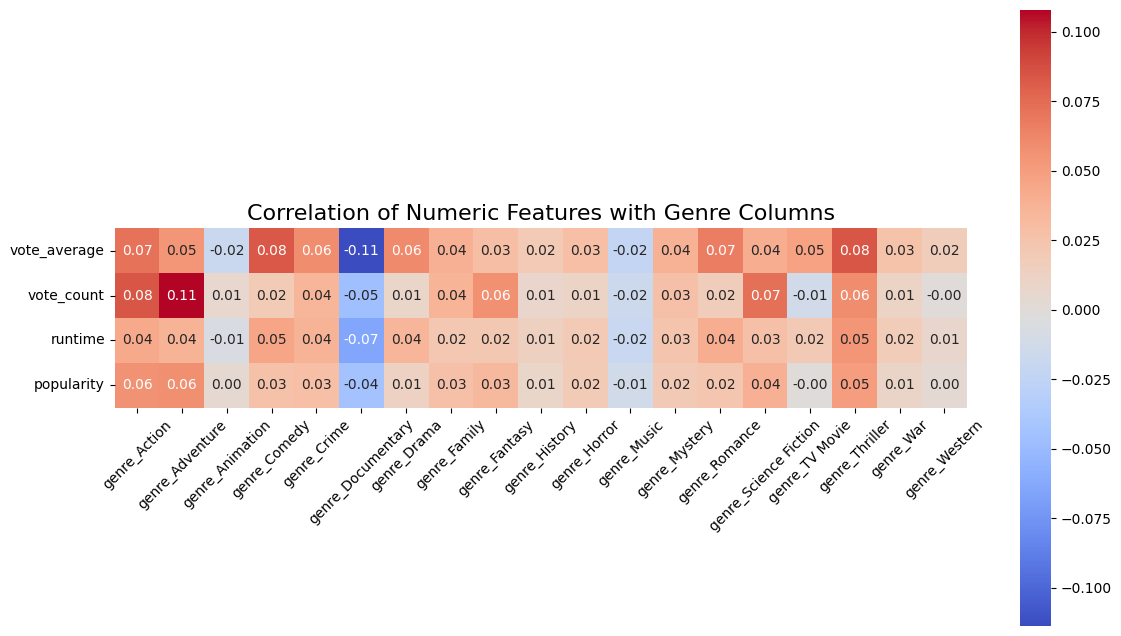

In [151]:
# Visualizing the correlation results
plt.figure(figsize=(12, 8))  # Set figure size
sns.heatmap(correlation_df, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Title and labels
plt.title('Correlation of Numeric Features with Genre Columns', fontsize=16)
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.yticks(rotation=0)   # Rotate y labels for better readability

# Show the plot
plt.tight_layout()  # Adjust the layout to prevent clipping
plt.show()

In [152]:
#  Text Features (TF-IDF):
# Convert sparse matrices to dense matrices
overview_mean = np.array(tfidf_overview_final.mean(axis=1)).flatten()  # Mean TF-IDF for each document
keywords_mean = np.array(tfidf_keywords_final.mean(axis=1)).flatten()
title_mean = np.array(tfidf_title_final.mean(axis=1)).flatten()

In [153]:
# Create a DataFrame with the reduced feature set
tfidf_df = pd.DataFrame({
    'overview_mean': overview_mean,
    'keywords_mean': keywords_mean,
    'title_mean': title_mean,
})

In [154]:
# Initialize a dictionary to hold the correlation results
txt_correlation_results = {}

# Calculate the correlation of each genre column with the TF-IDF features
for genre_col in genre_columns:
    correlation_with_genre = tfidf_df.corrwith(data[genre_col])  # Calculate correlation with each genre column
    txt_correlation_results[genre_col] = correlation_with_genre  # Store results

# Convert the results to a DataFrame for easier visualization
correlation_df = pd.DataFrame(txt_correlation_results)

# Display the correlation DataFrame
print(correlation_df)

               genre_Action  genre_Adventure  genre_Animation  genre_Comedy  \
overview_mean      0.052454         0.025639        -0.041479     -0.033258   
keywords_mean      0.071947         0.085644        -0.020656      0.030334   
title_mean        -0.014297         0.006566        -0.015931     -0.005410   

               genre_Crime  genre_Documentary  genre_Drama  genre_Family  \
overview_mean     0.014894           0.060771     0.017672      0.001404   
keywords_mean     0.065694          -0.050508     0.060755      0.030110   
title_mean       -0.040997           0.182277    -0.196269      0.021044   

               genre_Fantasy  genre_History  genre_Horror  genre_Music  \
overview_mean       0.011669       0.025023      0.015208     0.006685   
keywords_mean       0.064231       0.065533      0.060853    -0.022836   
title_mean         -0.016319       0.020155     -0.067134     0.180916   

               genre_Mystery  genre_Romance  genre_Science Fiction  \
overview_me

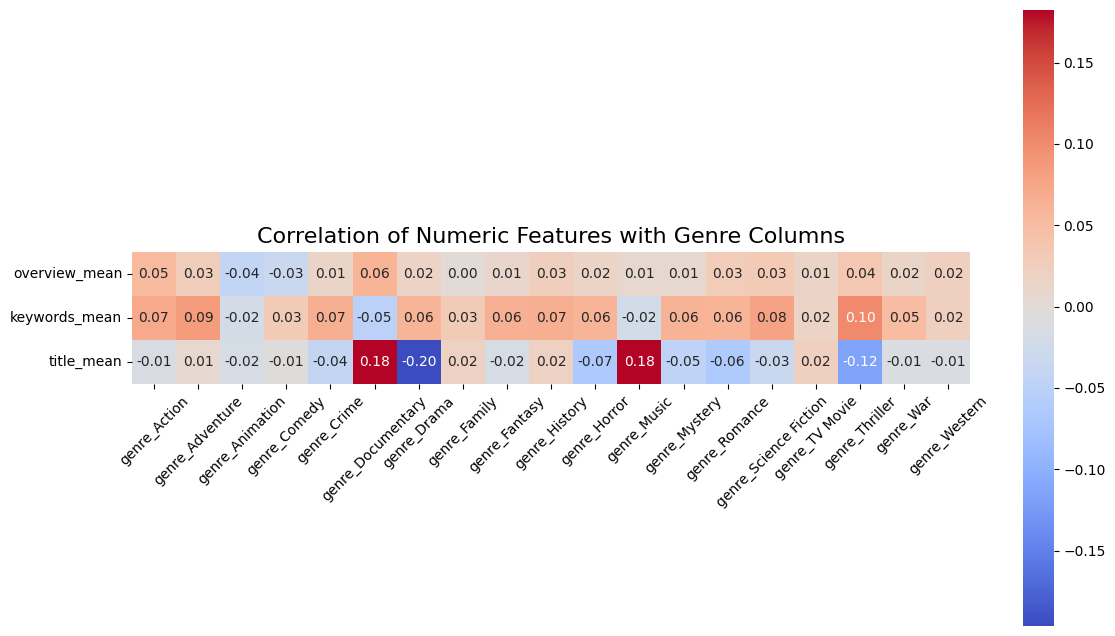

In [155]:
# Visualizing the correlation results
plt.figure(figsize=(12, 8))  # Set figure size
sns.heatmap(correlation_df, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Title and labels
plt.title('Correlation of Numeric Features with Genre Columns', fontsize=16)
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.yticks(rotation=0)   # Rotate y labels for better readability

# Show the plot
plt.tight_layout()  # Adjust the layout to prevent clipping
plt.show()


# Distribution Fitting

2024-10-21 22:48:09.083 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=32.086282)
2024-10-21 22:48:09.099 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted expon distribution with error=30.178195)
2024-10-21 22:48:09.357 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted uniform distribution with error=31.944012)
2024-10-21 22:48:09.449 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted rayleigh distribution with error=31.953464)
2024-10-21 22:48:12.776 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted cauchy distribution with error=32.944012)
2024-10-21 22:48:14.937 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gamma distribution with error=18.197826)
2024-10-21 22:48:15.390 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted chi2 distribution with error=25.210917)
2024-10-21 22:48:17.644 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitt


Summary for vote_average:
          sumsquare_error          aic          bic  kl_div  ks_statistic  \
gamma           18.197826  1308.741114  1342.991018     inf      0.566097   
exponpow        19.395656   745.564189   779.814093     inf      0.567309   
chi2            25.210917   616.729401   650.979305     inf      0.567312   
expon           30.178195   578.364378   601.197648     inf      0.567312   
uniform         31.944012   464.517019   487.350288     inf      0.567312   

          ks_pvalue  
gamma           0.0  
exponpow        0.0  
chi2            0.0  
expon           0.0  
uniform         0.0  

Best fit:
{'gamma': {'a': 0.1125084820679006, 'loc': -1.1763792831325473e-26, 'scale': 1.5753991028913603}}


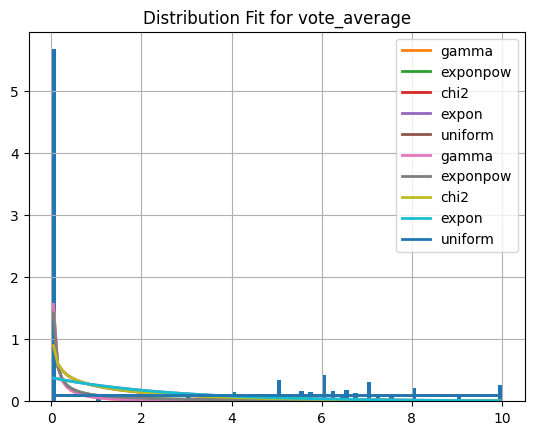

2024-10-21 22:48:22.782 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted expon distribution with error=7e-06)
2024-10-21 22:48:22.860 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=4e-06)
2024-10-21 22:48:22.956 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted uniform distribution with error=8e-06)
2024-10-21 22:48:23.085 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted rayleigh distribution with error=3e-06)
2024-10-21 22:48:26.793 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted cauchy distribution with error=8e-06)
2024-10-21 22:48:28.215 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gamma distribution with error=8e-06)
2024-10-21 22:48:28.704 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted chi2 distribution with error=3e-06)
2024-10-21 22:48:31.240 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted powerlaw distribution wit


Summary for vote_count:
          sumsquare_error            aic            bic    kl_div  \
rayleigh         0.000003  226853.373607  226876.206877  0.964095   
chi2             0.000003    6322.804767    6357.054671       inf   
norm             0.000004  232129.125898  232151.959168  1.364335   
exponpow         0.000004   25104.089983   25138.339887       inf   
expon            0.000007  109234.033712  109256.866981       inf   

          ks_statistic  ks_pvalue  
rayleigh      0.536508        0.0  
chi2          0.858197        0.0  
norm          0.469407        0.0  
exponpow      0.840420        0.0  
expon         0.701188        0.0  

Best fit:
{'rayleigh': {'loc': -405.9189663789503, 'scale': 426.02960531140025}}


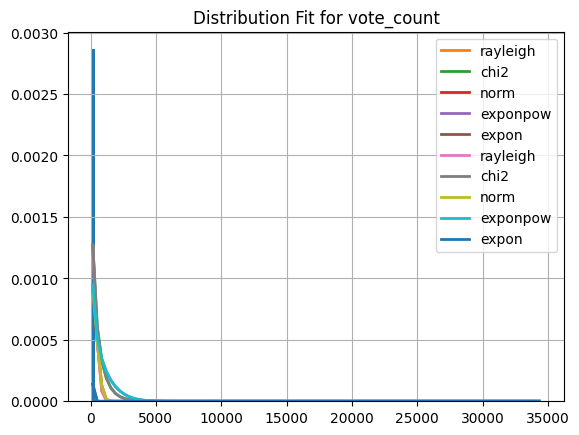

2024-10-21 22:48:35.972 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted expon distribution with error=4e-06)
2024-10-21 22:48:36.039 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=0.0)
2024-10-21 22:48:36.145 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted uniform distribution with error=4.5e-05)
2024-10-21 22:48:36.197 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted rayleigh distribution with error=0.0)
2024-10-21 22:48:36.956 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted cauchy distribution with error=2e-06)
2024-10-21 22:48:41.972 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gamma distribution with error=4.5e-05)
2024-10-21 22:48:42.684 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted chi2 distribution with error=4.5e-05)
2024-10-21 22:48:44.092 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted powerlaw distribution w


Summary for runtime:
          sumsquare_error           aic           bic  kl_div  ks_statistic  \
rayleigh     1.010216e-09  1.179364e+06  1.179386e+06     inf      0.170294   
norm         2.332346e-07  1.848346e+06  1.848368e+06     inf      0.189971   
cauchy       1.602280e-06  2.929170e+03  2.952003e+03     inf      0.225049   
expon        3.550680e-06  2.776231e+04  2.778514e+04     inf      0.200237   
exponpow     1.903878e-05  2.807502e+05  2.807845e+05     inf      0.499427   

          ks_pvalue  
rayleigh        0.0  
norm            0.0  
cauchy          0.0  
expon           0.0  
exponpow        0.0  

Best fit:
{'rayleigh': {'loc': -36.65517962500917, 'scale': 76.8480398530805}}


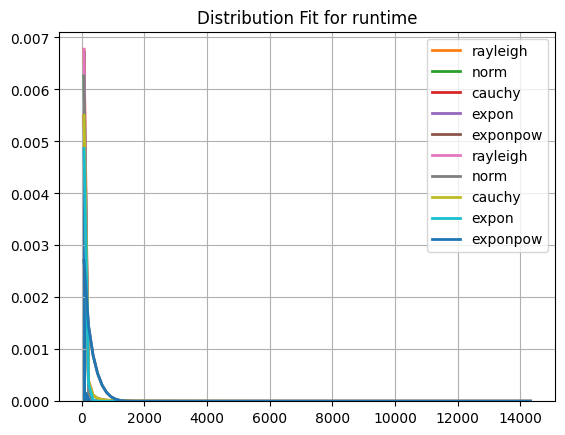

2024-10-21 22:48:49.218 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted expon distribution with error=0.001102)
2024-10-21 22:48:49.262 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=0.000292)
2024-10-21 22:48:49.362 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted uniform distribution with error=0.001097)
2024-10-21 22:48:49.476 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted rayleigh distribution with error=0.000341)
2024-10-21 22:48:50.388 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted cauchy distribution with error=0.001103)
2024-10-21 22:48:56.032 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gamma distribution with error=0.001108)
2024-10-21 22:48:56.280 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted chi2 distribution with error=0.00052)
2024-10-21 22:48:58.650 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted power


Summary for popularity:
          sumsquare_error           aic           bic    kl_div  ks_statistic  \
norm             0.000292  3.139483e+06  3.139505e+06  0.002820      0.430662   
rayleigh         0.000341  3.000961e+06  3.000983e+06  0.003214      0.435705   
exponpow         0.000382  1.226033e+05  1.226376e+05       inf      0.700448   
chi2             0.000520  1.071268e+04  1.074693e+04       inf      0.360468   
powerlaw         0.001007  2.136259e+03  2.170509e+03       inf      0.754231   

          ks_pvalue  
norm            0.0  
rayleigh        0.0  
exponpow        0.0  
chi2            0.0  
powerlaw        0.0  

Best fit:
{'norm': {'loc': 1.703133132858671, 'scale': 9.749499729980782}}


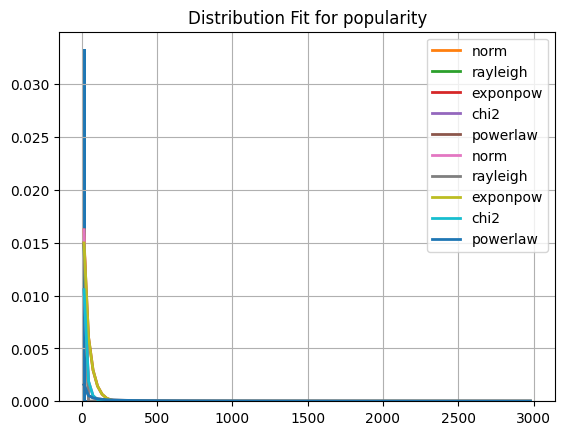

In [156]:
# Function to fit distributions to a column and plot results
def get_dist(col):
    column_data = data[col].dropna().values  # Ensure NaN values are dropped
    f = Fitter(column_data, distributions=get_common_distributions())  # Fit common distributions
    f.fit()  # Perform fitting
    print(f"\nSummary for {col}:")
    print(f.summary())  # Display summary of fitting results
    print("\nBest fit:")
    print(f.get_best(method='sumsquare_error'))  # Display the best-fitting distribution
    
    # Plot the results
    f.plot_pdf()  # Plot the PDF of the best-fitting distribution
    plt.title(f'Distribution Fit for {col}')
    plt.show()  # Display the plot


# Applying it to the columns of interest in your dataset

for col in numerical_features:
    get_dist(col)  # Fit and analyze each column


# Normalize and Scale Numerical features

In [157]:
# Normalization functions for specific distributions
# Normalization for Normal distribution
def normalize_column_norm(column_name):
    mean = data[column_name].mean()
    std = data[column_name].std()
    data[column_name] = (data[column_name] - mean) / std

# Normalization for Gamma distribution
def normalize_column_gamma(column_name):
    # Assuming the shape and scale are defined as mean and standard deviation
    shape = np.nanmean(data[column_name])  # Using mean as shape
    scale = np.nanstd(data[column_name])    # Using std as scale
    
    data[column_name] = (data[column_name] - shape) / scale

# Normalization for Rayleigh distribution
def normalize_column_rayleigh(column_name):
    scale = np.nanstd(data[column_name])  # Using standard deviation as scale
    data[column_name] = data[column_name] / scale  # Assuming location parameter is 0


In [158]:
normalize_column_gamma('vote_average')
normalize_column_rayleigh('vote_count')
normalize_column_rayleigh('runtime')
normalize_column_norm('popularity')

In [159]:
print(data.head())
print(data.info())

             title  vote_average  vote_count release_date   runtime  \
0        Inception      1.771985   83.315224   2010-07-15  2.433094   
1     Interstellar      1.788333   78.668217   2014-11-05  2.778330   
2  The Dark Knight      1.817636   73.953583   2008-07-16  2.498853   
3           Avatar      1.527997   72.011694   2009-12-15  2.663251   
4     The Avengers      1.570256   70.444175   2012-04-25  2.350895   

   popularity  is_adult  genre_Action  genre_Adventure  genre_Animation  ...  \
0    8.436208       0.0           1.0              1.0              0.0  ...   
1   14.209730       0.0           0.0              1.0              0.0  ...   
2   13.225270       0.0           1.0              0.0              0.0  ...   
3    8.023879       0.0           1.0              1.0              0.0  ...   
4    9.885512       0.0           1.0              1.0              0.0  ...   

   Wallis and Futuna Islands  Western Sahara  Yemen  Yugoslavia  Zaire  \
0                 

# Removing NULL

In [163]:
print("Number of rows before removing null values:", len(data))

Number of rows before removing null values: 1103311


In [164]:
# NULL removeee

data.replace('NULL', np.nan, inplace=True)

data.dropna(inplace=True)

print("Number of rows after removing null values:", len(data))

Number of rows after removing null values: 163287


In [165]:
data.drop(columns=['NULL'], inplace=True)

In [166]:
# Ensure 'release_date' is in datetime format
data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')

# Create separate columns for day, month, and year
data['release_day'] = data['release_date'].dt.day
data['release_month'] = data['release_date'].dt.month
data['release_year'] = data['release_date'].dt.year

data.drop(columns=['release_date'], inplace=True)


In [167]:
# Print the list of column headers
column_headers = data.columns.tolist()
print("List of column headers:")
for header in column_headers:
    print(header)
print(column_headers)

List of column headers:
title
vote_average
vote_count
runtime
popularity
is_adult
genre_Action
genre_Adventure
genre_Animation
genre_Comedy
genre_Crime
genre_Documentary
genre_Drama
genre_Family
genre_Fantasy
genre_History
genre_Horror
genre_Music
genre_Mystery
genre_Romance
genre_Science Fiction
genre_TV Movie
genre_Thriller
genre_War
genre_Western
Canceled
In Production
Planned
Post Production
Released
Rumored
aa
ab
af
ak
am
ar
as
ay
az
ba
be
bg
bi
bm
bn
bo
br
bs
ca
ce
ch
cn
co
cr
cs
cv
cy
da
de
dv
dz
el
en
eo
es
et
eu
fa
ff
fi
fj
fo
fr
fy
ga
gd
gl
gn
gu
gv
ha
he
hi
hr
ht
hu
hy
hz
ia
id
ie
ig
ii
is
it
iu
ja
jv
ka
kg
ki
kj
kk
kl
km
kn
ko
ks
ku
kv
kw
ky
la
lb
lg
li
ln
lo
lt
lv
mg
mh
mi
mk
ml
mn
mo
mr
ms
mt
my
nb
nd
ne
nl
nn
no
nv
ny
oc
om
or
os
pa
pl
ps
pt
qu
rm
rn
ro
ru
rw
sa
sc
sd
se
sg
sh
si
sk
sl
sm
sn
so
sq
sr
ss
st
su
sv
sw
ta
te
tg
th
ti
tk
tl
tn
to
tr
ts
tt
tw
ty
ug
uk
ur
uz
vi
wo
xh
xx
yi
yo
za
zh
zu
Abkhazian
Afar
Afrikaans
Akan
Albanian
Amharic
Arabic
Aragonese
Armenian
Assa

In [168]:
print(data.head())
print(data.info())

             title  vote_average  vote_count   runtime  popularity  is_adult  \
0        Inception      1.771985   83.315224  2.433094    8.436208       0.0   
1     Interstellar      1.788333   78.668217  2.778330   14.209730       0.0   
2  The Dark Knight      1.817636   73.953583  2.498853   13.225270       0.0   
3           Avatar      1.527997   72.011694  2.663251    8.023879       0.0   
4     The Avengers      1.570256   70.444175  2.350895    9.885512       0.0   

   genre_Action  genre_Adventure  genre_Animation  genre_Comedy  ...  \
0           1.0              1.0              0.0           0.0  ...   
1           0.0              1.0              0.0           0.0  ...   
2           1.0              0.0              0.0           0.0  ...   
3           1.0              1.0              0.0           0.0  ...   
4           1.0              1.0              0.0           0.0  ...   

   Yugoslavia  Zaire  Zambia  Zimbabwe  \
0         0.0    0.0     0.0       0.0   
1 

# Text features

In [171]:
# Initialize resources for text preprocessing
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Function to preprocess text (removing stop words, punctuation, stemming)
def preprocess_text(text):
    if pd.isna(text):  # Check for NaN values
        return 'NULL'  # Handle NaN as needed
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    text = ' '.join(word for word in text.split() if word not in stop_words)  # Remove stop words
    text = ' '.join(stemmer.stem(word) for word in text.split())  # Stemming
    return text


# Initialize TF-IDF vectorizers for each feature
tfidf_vectorizer_overview = TfidfVectorizer()
tfidf_vectorizer_keywords = TfidfVectorizer()
tfidf_vectorizer_title = TfidfVectorizer()

# Define file names
tfidf_overview_file = '/Users/faridabey/Documents/Fall 2024/ML/project/phaseII/tfidf_overview.npz'
tfidf_keywords_file = '/Users/faridabey/Documents/Fall 2024/ML/project/phaseII/tfidf_keywords.npz'
tfidf_title_file = '/Users/faridabey/Documents/Fall 2024/ML/project/phaseII/tfidf_title.npz'

In [172]:


# Perform TF-IDF transformation on the cleaned 'overview' text
tfidf_overview_final = tfidf_vectorizer_overview.fit_transform(data['overview_cleaned'])


# Perform TF-IDF transformation on the cleaned 'keywords' text
tfidf_keywords_final = tfidf_vectorizer_keywords.fit_transform(data['keywords_cleaned'])


# Perform TF-IDF transformation on the cleaned 'title' text
tfidf_title_final = tfidf_vectorizer_title.fit_transform(data['title_cleaned'])

# Save the final TF-IDF matrices to file
sparse.save_npz(tfidf_overview_file, tfidf_overview_final)
sparse.save_npz(tfidf_keywords_file, tfidf_keywords_final)
sparse.save_npz(tfidf_title_file, tfidf_title_final)

print(f"Preprocessing complete. TF-IDF for overview saved, keywords saved, title saved.")


Preprocessing complete. TF-IDF for overview saved, keywords saved, title saved.


In [173]:
print(data.head())
print(data.info())

   vote_average  vote_count   runtime  popularity  is_adult  genre_Action  \
0      1.771985   83.315224  2.433094    8.436208       0.0           1.0   
1      1.788333   78.668217  2.778330   14.209730       0.0           0.0   
2      1.817636   73.953583  2.498853   13.225270       0.0           1.0   
3      1.527997   72.011694  2.663251    8.023879       0.0           1.0   
4      1.570256   70.444175  2.350895    9.885512       0.0           1.0   

   genre_Adventure  genre_Animation  genre_Comedy  genre_Crime  ...  \
0              1.0              0.0           0.0          0.0  ...   
1              1.0              0.0           0.0          0.0  ...   
2              0.0              0.0           0.0          1.0  ...   
3              1.0              0.0           0.0          0.0  ...   
4              1.0              0.0           0.0          0.0  ...   

   Yugoslavia  Zaire  Zambia  Zimbabwe  \
0         0.0    0.0     0.0       0.0   
1         0.0    0.0     0

# Save Processed Dataset

In [174]:
data.to_csv('cleaned_tmdb_dataset.csv', index=False)
print("DataFrame saved to csv")

DataFrame saved to csv


In [177]:
data.drop(columns=['title'], inplace=True)
data.to_csv('final_tmdb_dataset.csv', index=False)
print("final dataset")

final dataset
